In [1]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [3]:
creds = '{"username":"pangda0xff","key":"dcdc0649194d1cae41918229d5cf4e2b"}'

In [4]:
# for working with paths in Python, I recommend using `pathlib.Path`
from pathlib import Path

cred_path = Path('~/.kaggle/kaggle.json').expanduser()
if not cred_path.exists():
    cred_path.parent.mkdir(exist_ok=True)
    cred_path.write_text(creds)
    cred_path.chmod(0o600)

In [5]:

path = Path('house-prices-advanced-regression-techniques')

In [6]:
if not iskaggle and not path.exists():
    import zipfile,kaggle
    # kaggle.api.competition_download_cli(str(path))
    zipfile.ZipFile(f'mywork/{path}.zip').extractall(path)

In [5]:
train_file_path = "house-prices-advanced-regression-techniques/train.csv"
dataset_df = pd.read_csv(Path(train_file_path).open(), low_memory=False)
print("Full train dataset shape is {}".format(dataset_df.shape))

Full train dataset shape is (1460, 81)


In [8]:
!pwd

/notebooks/mywork


In [9]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
dataset_df = dataset_df.drop('Id', axis=1)
dataset_df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [10]:
all_df = dataset_df.copy()

In [12]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
all_df.select_dtypes(include=["object", "string"]).nunique().index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
def preprocess_data(df):
    for column_name in df.select_dtypes(include=["object", "string"]).nunique().index:
        df[column_name] = pd.Categorical(df[column_name]).codes
    df.fillna(df.mode().iloc[0], inplace=True)

In [11]:
preprocess_data(all_df)

In [ ]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [13]:
train_df, valid_df = train_test_split(
    all_df,
    test_size=0.2,   # 20% for validation
    shuffle=True     # shuffle before splitting (default = True)
)

In [18]:
train_xs = train_df.drop('SalePrice', axis=1)
train_y = train_df.SalePrice
regressor = rf(train_xs, train_y, max_samples=1000)

In [15]:
import math
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [16]:
test_file_path = "./house-prices-advanced-regression-techniques/test.csv"
test_df = pd.read_csv(test_file_path, low_memory=False)
print("Full test dataset shape is {}".format(dataset_df.shape))

Full test dataset shape is (1460, 80)


In [23]:
ids = test_df.pop('Id')

In [24]:
preprocess_data(test_df)

In [31]:
prices = regressor.predict(test_df)

In [33]:
result = pd.DataFrame({
    'Id': ids,
    'SalePrice': prices
})
result

,Id,SalePrice
0,1461,125619.613663
1,1462,155628.122988
2,1463,191354.523673
3,1464,184963.692232
4,1465,202923.341457
...,...,...
1454,2915,93555.473813
1455,2916,92799.982752
1456,2917,165043.744592
1457,2918,117437.634791


In [35]:
result.to_csv('submission.csv', index=False)

In [37]:
!kaggle competitions submit -c 'house-prices-advanced-regression-techniques' -f submission.csv -m "My first submission"

100%|███████████████████████████████████████| 33.7k/33.7k [00:00<00:00, 108kB/s]
Successfully submitted to House Prices - Advanced Regression Techniques

In [17]:
from pandas import DataFrame

def rf_feat_importance(m, df) -> DataFrame:
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [20]:
fi = rf_feat_importance(regressor, train_xs)
fi

,cols,imp
16,OverallQual,0.330507
45,GrLivArea,0.152751
60,GarageCars,0.114146
26,ExterQual,0.059513
61,GarageArea,0.056281
...,...,...
68,3SsnPorch,0.000000
8,Utilities,0.000000
13,Condition2,0.000000
21,RoofMatl,0.000000


<Axes: ylabel='cols'>

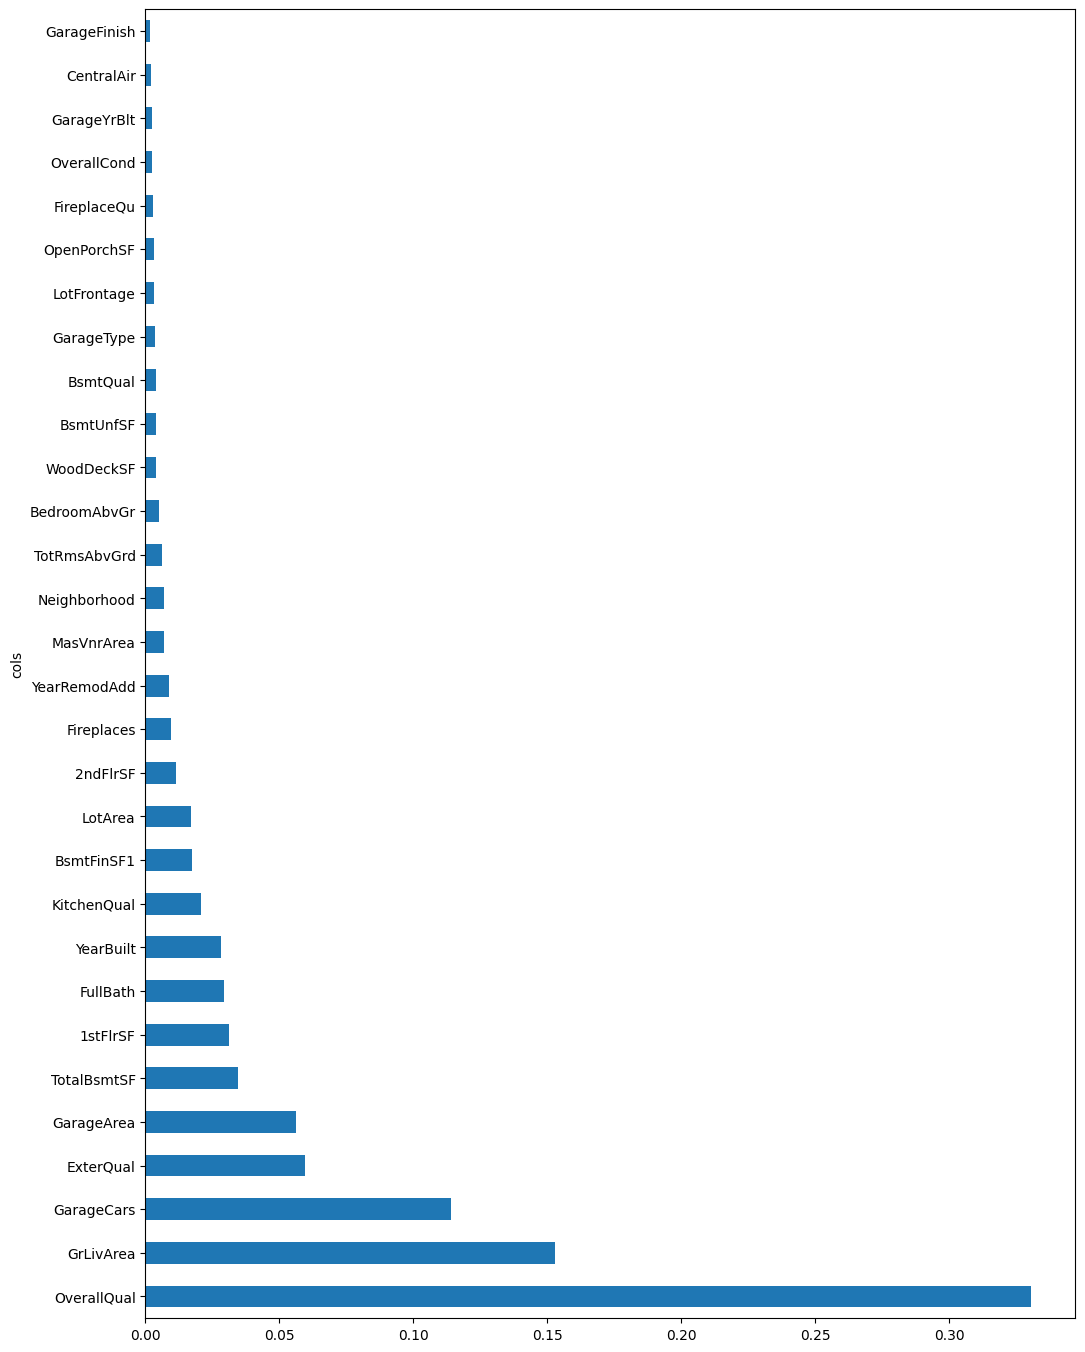

In [27]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,17), legend=False)

plot_fi(fi[:30])

### Removing Low-Importance Variables

In [26]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

19

In [28]:
train_xs_i = train_xs[to_keep]
train_y_i = train_y[to_keep]

m_i = rf(train_xs_i, train_y_i)

KeyError: "None of [Index(['OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea',\n       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt', 'KitchenQual',\n       'BsmtFinSF1', 'LotArea', '2ndFlrSF', 'Fireplaces', 'YearRemodAdd',\n       'MasVnrArea', 'Neighborhood', 'TotRmsAbvGrd', 'BedroomAbvGr'],\n      dtype='object')] are in the [index]"